<a href="https://colab.research.google.com/github/YogeshYadav-spec/Healthcare-Patient-Analytics/blob/main/Healthcare_Patient_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Null values per column after cleaning:\n", df.isnull().sum())

In [2]:
df = pd.read_excel('/content/drive/MyDrive/healthcare_patients_500.xlsx')

In [5]:
#Data Cleaning
#Missing value check
#Duplicate removal


In [8]:
df.isnull().sum()
df = df.drop_duplicates()


In [9]:
print(df)

     patient_id first_name last_name gender  age        department  \
0             1      Pooja     Singh      M   18         Emergency   
1             2       Amit     Verma      M   28       Orthopedics   
2             3      Pooja   Agarwal      M   76         Neurology   
3             4      Vikas     Singh      F   44        Cardiology   
4             5       Neha    Sharma      F   59  General Medicine   
..          ...        ...       ...    ...  ...               ...   
495         496      Rohit     Verma      M   22          Oncology   
496         497     Ramesh     Mehta      M   14       Orthopedics   
497         498      Vikas    Sharma      F   59         Emergency   
498         499       Neha      Khan      M   10  General Medicine   
499         500      Priya     Mehta      F   41        Cardiology   

    admission_date discharge_date    doctor_name  treatment_cost visit_type  
0       2024-01-13     2024-01-17   Dr. A. Mehta          177892  Emergency  
1  

In [ ]:
# Feature Engineering
#Length of Stay
#Age Grouping

In [10]:
df['length_of_stay'] = (df['discharge_date'] - df['admission_date']).dt.days

bins = [0,18,35,50,65,100]
labels = ['Child','Young Adult','Adult','Middle Age','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

In [11]:
print(df)

     patient_id first_name last_name gender  age        department  \
0             1      Pooja     Singh      M   18         Emergency   
1             2       Amit     Verma      M   28       Orthopedics   
2             3      Pooja   Agarwal      M   76         Neurology   
3             4      Vikas     Singh      F   44        Cardiology   
4             5       Neha    Sharma      F   59  General Medicine   
..          ...        ...       ...    ...  ...               ...   
495         496      Rohit     Verma      M   22          Oncology   
496         497     Ramesh     Mehta      M   14       Orthopedics   
497         498      Vikas    Sharma      F   59         Emergency   
498         499       Neha      Khan      M   10  General Medicine   
499         500      Priya     Mehta      F   41        Cardiology   

    admission_date discharge_date    doctor_name  treatment_cost visit_type  \
0       2024-01-13     2024-01-17   Dr. A. Mehta          177892  Emergency   
1

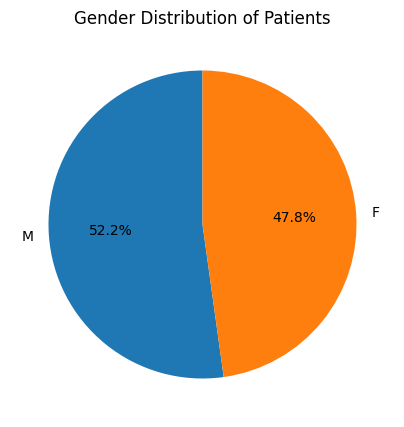

In [13]:
#Shows male vs female patient ratio.

gender_counts = df['gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Gender Distribution of Patients")
plt.show()

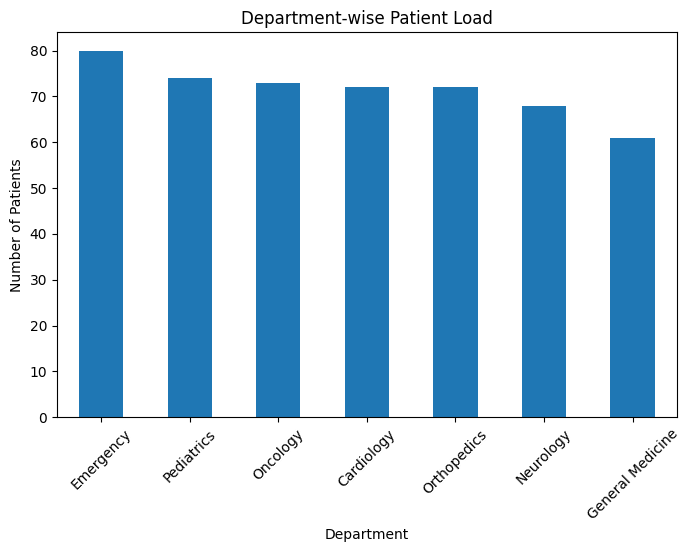

In [14]:
#Dept. wise Patient Load

plt.figure(figsize=(8,5))
df['department'].value_counts().plot(kind='bar')

plt.title("Department-wise Patient Load")
plt.xlabel("Department")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

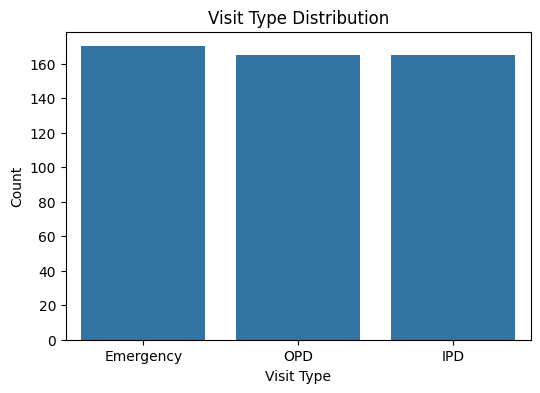

In [15]:
#Visit Type Distribution (OPD / IPD / Emergency)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='visit_type')

plt.title("Visit Type Distribution")
plt.xlabel("Visit Type")
plt.ylabel("Count")
plt.show()

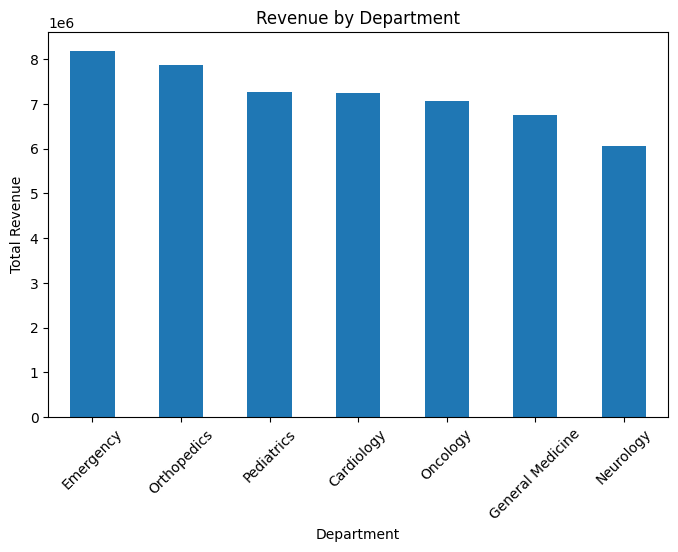

In [16]:
#Revenue by Department

revenue_by_dept = df.groupby('department')['treatment_cost'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
revenue_by_dept.plot(kind='bar')

plt.title("Revenue by Department")
plt.xlabel("Department")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [17]:
plt.savefig("gender_distribution.png", bbox_inches='tight')


<Figure size 640x480 with 0 Axes>